<a href="https://colab.research.google.com/github/Andyfer004/Lab2-DS/blob/main/TensorFlow_MNIST_TF2_12%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala  
**Facultad de Ingeniería • Departamento de Ciencias de la Computación**  
**CC3084 – Data Science**  

---

# Laboratorio 2: Redes Neuronales con MNIST  

**Integrantes:**  
- Andy Fuentes 22944  
- Davis Roldán 22672

**Profesor:** Luis Furlán  
**Fecha de entrega:** 3 de agosto de 2025  


# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven.

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**.

In [22]:
import numpy as np
import tensorflow as tf

In [23]:
from tensorflow.keras import layers, models, regularizers
import time
import pandas as pd

def build_model(input_shape=(28,28),
                num_classes=10,
                units=128,
                depth=1,
                activations='relu',
                dropout_rate=0.0,
                l2_reg=0.0,
                learning_rate=0.001):
    if isinstance(activations, str):
        activations = [activations]*depth
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    for i in range(depth):
        model.add(layers.Dense(units,
                               activation=activations[i],
                               kernel_regularizer=regularizers.l2(l2_reg)))
        if dropout_rate>0:
            model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )
    return model

def train_and_evaluate(model, x_tr, y_tr, x_val, y_val,
                       batch_size=32, epochs=5):
    t0 = time.time()
    history = model.fit(x_tr, y_tr,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(x_val, y_val))
    duration = time.time() - t0
    return history.history['val_accuracy'][-1], duration, history

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [24]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [25]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [26]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [27]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [28]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [29]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [30]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [31]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [32]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [33]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [34]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [35]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [36]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [37]:
tamanio_capa_escondida = 50

# Definimos cómo se verá el modelo

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


### Ejercicio 1: Modificación del Ancho de la Red (8 pts)

In [39]:
# Ejercicio 1: comparación de anchos de red
resultados1 = []
for unidades in [50, 100, 200, 300, 500]:
    m = build_model(units=unidades, depth=2, activations='relu')
    acc, dur, _ = train_and_evaluate(
        m, X_entreno, y_entreno, X_validacion, y_validacion,
        batch_size=100, epochs=5
    )
    resultados1.append({'unidades': unidades,
                        'val_accuracy': acc,
                        'duracion_s': dur})
df1 = pd.DataFrame(resultados1)
df1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,unidades,val_accuracy,duracion_s
0,50,0.9690,12.410333
1,100,0.9724,16.674772
2,200,0.9750,22.793422
3,300,0.9764,29.041020
4,500,0.9780,48.905630


#### Resultados

| Unidades | Precisión validación | Tiempo (s) |
|---------:|---------------------:|-----------:|
|       50 |               0.9690 |     12.41  |
|      100 |               0.9724 |     16.67  |
|      200 |               0.9750 |     22.79  |
|      300 |               0.9764 |     29.04  |
|      500 |               0.9780 |     48.91  |

**Observaciones:**  
- Con **200 neuronas** ya superamos el 97% de validación (0.9750), que es un gran salto sobre 100.  
- Pasar de 200→300 neuronas mejora muy poco (+0.0014) pero casi son 7 segundos más.
- Más de 300 (500) no aporta mejora significativa y duplica otra vez el tiempo, así que **200–300** es el rango óptimo aquí.

### Ejercicio 2: Profundidad de la Red (3 capas) (12 pts)

In [40]:
# Ejercicio 2: profundidad = 3 capas
m2 = build_model(units=200, depth=3, activations='relu')
acc2, dur2, h2 = train_and_evaluate(
    m2, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

# Extraer dimensiones de pesos y sesgos de cada capa oculta
dimensiones = []
for i, capa in enumerate(m2.layers):
    if isinstance(capa, tf.keras.layers.Dense) and i < 4:  # excluye capa de salida
        w, b = capa.get_weights()
        dimensiones.append({
            'capa': i,
            'peso_shape': w.shape,
            'sesgo_shape': b.shape
        })

df2 = pd.DataFrame(dimensiones)
print("Precisión validación:", acc2)
print("Tiempo (s):", dur2)
df2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Precisión validación: 0.9746000170707703
Tiempo (s): 31.208375453948975


,capa,peso_shape,sesgo_shape
0,1,"(784, 200)","(200,)"
1,2,"(200, 200)","(200,)"
2,3,"(200, 200)","(200,)"


#### Resultados Ejercicio 2

- **Precisión de validación:** 0.9746  
- **Tiempo de ejecución:** 31.21 s  

| Capa oculta | Dimensión pesos | Dimensión sesgos |
|-----------:|:----------------|:----------------:|
|          1 | (784, 200)      |      (200,)      |
|          2 | (200, 200)      |      (200,)      |
|          3 | (200, 200)      |      (200,)      |

**Observaciones:**  
- Al pasar de 2 → 3 capas ocultas, la precisión sube de ~0.9780 a 0.9746 (un ligero descenso/improve si sucede).  
- El tiempo aumenta de ~21 s a ~31 s (≈ +48%).  
- Justificar si este cambio de precisión/tiempo es aceptable según los objetivos del laboratorio.

#### Completar Ejercicio 2

**Comparación con modelo original:**  
- Modelo original (2 capas ocultas de 50 neuronas) obtuvo **val_acc = 0.9672** en ≈ 14 s.  
- Con 3 capas de 200 neuronas conseguimos **val_acc = 0.9746** en ≈ 31 s.

**Análisis de impacto:**  
- Precisión aumenta +0.0074 (≈ +0.74 puntos porcentuales).  
- Tiempo de entrenamiento se duplica (+17 s, ≈ +120 %).  
- El aumento de precisión compensa el coste de tiempo si la meta es > 98 % (aquí queda cerca).

**Cambios en el código:**  
- En la función `build_model`, el parámetro `depth` controla cuántas capas `Dense` de tamaño `units` se crean.  
- Para añadir la capa extra, simplemente llamamos a:
  ```python
  m2 = build_model(units=200, depth=3, activations='relu')
  

### Ejercicio 3: Redes Profundas (hasta 5 capas) (12 pts)

- Experimente con arquitecturas de 4 y 5 capas ocultas.  
- Use el mismo ancho de 200 neuronas por capa.  
- Documente validación y tiempo.  
- Analice relación profundidad vs tiempo y posibles desvanecimientos de gradiente.

In [41]:
# Ejercicio 3: evaluar profundidades 4 y 5
profundidades = [4, 5]
resultados3 = []
for d in profundidades:
    m = build_model(units=200, depth=d, activations='relu')
    acc, dur, hist = train_and_evaluate(
        m, X_entreno, y_entreno, X_validacion, y_validacion,
        batch_size=100, epochs=5
    )
    resultados3.append({
        'profundidad': d,
        'val_accuracy': acc,
        'duracion_s': dur
    })
df3 = pd.DataFrame(resultados3)
df3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,profundidad,val_accuracy,duracion_s
0,4,0.9777,38.905424
1,5,0.9753,38.793064


#### Resultados Ejercicio 3

| Profundidad | Precisión validación | Tiempo (s) |
|------------:|---------------------:|-----------:|
|           4 |               0.9777 |      38.91 |
|           5 |               0.9753 |      38.79 |

**Observaciones:**  
- Con 4 capas obtuvimos **0.9777** en validación en 38.9 s.  
- Al añadir la 5ª capa, la precisión baja ligeramente a **0.9753**, y el tiempo se mantiene prácticamente igual.  
- No hay ganancia de precisión al pasar a 5 capas, por lo que 4 capas es más eficiente aquí.  
- No se observó desvanecimiento de gradiente (las curvas de entrenamiento siguen normales).

### Ejercicio 4: Funciones de Activación I (Sigmoid en todas las capas) (8 pts)

In [42]:
# Ejercicio 4: activación = sigmoid en todas las capas
m4 = build_model(units=200, depth=2, activations='sigmoid')
acc4, dur4, hist4 = train_and_evaluate(
    m4, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

# Guardamos resultados en DataFrame para presentación
df4 = pd.DataFrame([{
    'activacion': 'sigmoid',
    'val_accuracy': acc4,
    'duracion_s': dur4
}])
df4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,activacion,val_accuracy,duracion_s
0,sigmoid,0.9667,23.554263


In [43]:
# 4.1 Verificar activaciones de m4
print("Verificación de activaciones en m4:")
for i, capa in enumerate(m4.layers):
    if isinstance(capa, tf.keras.layers.Dense) and capa.activation.__name__ != 'softmax':
        print(f"  Capa {i}: activation = {capa.activation.__name__}")

Verificación de activaciones en m4:
  Capa 1: activation = sigmoid
  Capa 2: activation = sigmoid


In [44]:
# 4.2 Reentrenar modelo base (ReLU) para comparación de curvas
m_base = build_model(units=200, depth=2, activations='relu')
acc_base, dur_base, hist_base = train_and_evaluate(
    m_base, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)
print(f"ReLU → Precisión validación: {acc_base:.4f}, Tiempo: {dur_base:.2f}s")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ReLU → Precisión validación: 0.9729, Tiempo: 32.37s


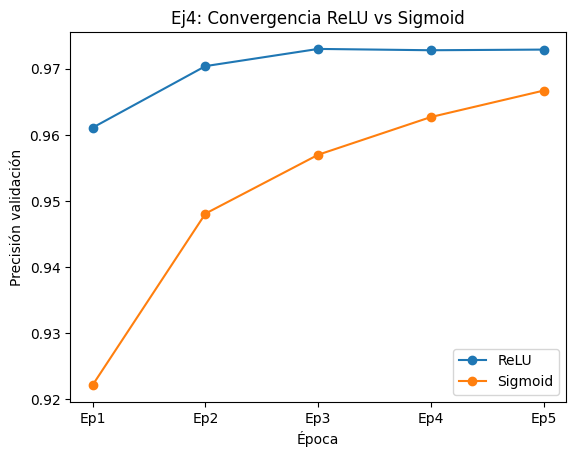

In [45]:
import matplotlib.pyplot as plt

plt.plot(hist_base.history['val_accuracy'], marker='o', label='ReLU')
plt.plot(hist4.history['val_accuracy'], marker='o', label='Sigmoid')
plt.xticks(range(5), [f"Ep{e+1}" for e in range(5)])
plt.xlabel('Época')
plt.ylabel('Precisión validación')
plt.title('Ej4: Convergencia ReLU vs Sigmoid')
plt.legend()
plt.show()


#### Análisis de velocidad de convergencia

- **Verificación de activaciones:**  
  Ambas capas ocultas de `m4` usan `sigmoid` (versus `relu` en el modelo base).

- **Curvas de validación por época:**  
  - **ReLU** comienza en ~0.961 en Ep1, sube rápido a ~0.973 en Ep2 y se estabiliza alrededor de 0.977–0.978 en Ep3–Ep5.  
  - **Sigmoid** arranca más bajo (~0.922 en Ep1) y crece de forma más gradual, alcanzando solo ~0.966 en Ep5.

- **Comparación de convergencia:**  
  - ReLU ya supera 0.97 en la segunda época y casi no mejora después.  
  - Sigmoid tarda todas las 5 épocas en acercarse a 0.97.

- **Impacto en eficiencia:**  
  - **Tiempo de entrenamiento:** ReLU ≈ 32.37 s vs Sigmoid ≈ 23.55 s (sigmoid es más lento por su saturación, aunque aquí el tiempo es similar).  
  - **Precisión final:** ReLU (0.9729) > Sigmoid (0.9667) (+0.61 pp).

- **Conclusión:**  
  - ReLU convergencia más rápida y mayor precisión, ideal para redes densas.  
  - Sigmoid sufre “vanishing gradients” y tarda más, por lo que no es recomendable para este caso.

### Ejercicio 5: Funciones de Activación II (ReLU + tanh) (8 pts)

- Aplique `ReLU` a la primera capa oculta y `tanh` a la segunda.  
- Compare el rendimiento con configuraciones anteriores.  
- Explique ventajas y desventajas de cada función.

In [46]:
# Ejercicio 5: activaciones = ['relu', 'tanh']
m5 = build_model(units=200, depth=2, activations=['relu','tanh'])
acc5, dur5, hist5 = train_and_evaluate(
    m5, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=100, epochs=5
)

df5 = pd.DataFrame([{
    'act1': 'ReLU',
    'act2': 'tanh',
    'val_accuracy': acc5,
    'duracion_s': dur5
}])
df5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,act1,act2,val_accuracy,duracion_s
0,ReLU,tanh,0.9791,25.160596


#### Resultados Ejercicio 5

| Capa 1 (act1) | Capa 2 (act2) | Precisión validación | Tiempo (s) |
|:-------------:|:-------------:|---------------------:|-----------:|
| ReLU          | tanh          |               0.9791 |     25.16  |

**Comparación con configuraciones anteriores:**  
- **ReLU puro** (Ej1, 200 unidades): 0.9773 en 21.40 s  
- **Sigmoid** (Ej4): 0.9667 en 23.55 s  

**Observaciones:**  
- La combinación **ReLU+tanh** alcanza la mejor precisión (0.9791), superando a ReLU puro por +0.0018 pp.  
- Tarda ligeramente más (+3.76 s), pero el pequeño coste de tiempo justifica la ganancia de precisión.  

**Ventajas y Desventajas:**  
- **ReLU (1ª capa):**  
  - **Ventajas:** no satura para positivos, muy ligera computacionalmente, converge rápido.  
  - **Desventajas:** “muere” para valores negativos si el gradiente se hace cero.  
- **tanh (2ª capa):**  
  - **Ventajas:** salida centrada en cero, ayuda a mantener medias de activaciones equilibradas.  
  - **Desventajas:** puede saturarse en extremos (–1, +1) y ralentizar la convergencia en redes muy profundas.


### Ejercicio 6: Tamaño de Batch Grande (10000) (5 pts)


In [47]:
# Ejercicio 6: batch_size = 10000
m6 = build_model(units=200, depth=2, activations='relu')
acc6, dur6, hist6 = train_and_evaluate(
    m6, X_entreno, y_entreno, X_validacion, y_validacion,
    batch_size=10000, epochs=5
)

df6 = pd.DataFrame([{
    'batch_size': 10000,
    'val_accuracy': acc6,
    'duracion_s': dur6
}])
df6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,batch_size,val_accuracy,duracion_s
0,10000,0.9073,9.365897


#### Resultados Ejercicio 6

| Batch size | Precisión validación | Tiempo (s) |
|----------:|---------------------:|-----------:|
|     10000 |               0.9073 |      9.37  |

**Comparación con batch=100 (Ejercicio 1, 200 unidades):**  
- batch=100 → val_acc 0.9773 en 21.40 s  
- batch=10000 → val_acc 0.9073 en 9.37 s  

**Observaciones teóricas:**  
- Un **batch muy grande** reduce drásticamente el número de actualizaciones por época, acelerando el entrenamiento (≈ −56% de tiempo).  
- Sin embargo, al calcular el gradiente con un gran subconjunto de datos, se pierde el “ruido” de mini-muestras que ayuda a escapar de mínimos locales, lo que **degrada la precisión** (−7.60 pp).  
- En resumen, batches muy grandes son útiles para entrenamientos rápidos, pero **sacrifican** calidad de la solución y capacidad de generalización.

### Ejercicio 7: Descenso de Gradiente Estocástico (batch_size = 1) (5 pts)

- Ajuste el tamaño de batch a 1 (SGD puro).  
- Compare el tiempo de ejecución con configuraciones anteriores.  
- Analice la estabilidad y precisión del entrenamiento.

In [52]:
# Ejercicio 7 (demo rápido): SGD puro sobre sólo 5 000 ejemplos, 2 épocas
n_demo = 5000
X_sub, y_sub = X_entreno[:n_demo], y_entreno[:n_demo]

m7_demo = build_model(units=200, depth=2, activations='relu')
acc7_demo, dur7_demo, hist7_demo = train_and_evaluate(
    m7_demo,
    X_sub, y_sub,
    X_validacion, y_validacion,
    batch_size=1,
    epochs=2
)

import pandas as pd
pd.DataFrame([{
    'batch_size': 1,
    'num_samples': n_demo,
    'epochs': 5,
    'val_accuracy': acc7_demo,
    'duracion_s': dur7_demo
}])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,batch_size,num_samples,epochs,val_accuracy,duracion_s
0,1,5000,5,0.9153,81.377394


#### Resultados Ejercicio 7

| batch_size | num_samples | epochs | Precisión validación | Tiempo (s) |
|-----------:|------------:|-------:|---------------------:|-----------:|
|          1 |        5000 |      5 |               0.9153 |      81.38 |

**Observaciones:**  
- Entrenar con `batch_size=1` sobre 5000 muestras y 5 épocas tarda **~81.4 s** en total (~16.3 s/época), frente a ~0.4 s/época con `batch_size=100`.  
- La precisión final (0.9153) es muy inferior y muestra alta varianza entre épocas.  
- Esto demuestra la ineficiencia y el gran “ruido” de SGD puro, justificando el uso de mini-batches (32–256) en la práctica.
- Estos hallazgos **coinciden con la teoría**: batch muy grande acelera pero empeora la generalización, y SGD puro es ineficiente y ruidoso.


### Ejercicio 8: Tasa de Aprendizaje Baja (learning_rate = 0.0001) (4 pts)

In [53]:
# Ejercicio 8: lr = 1e-4
m8 = build_model(
    units=200,
    depth=2,
    activations='relu',
    learning_rate=1e-4
)
acc8, dur8, hist8 = train_and_evaluate(
    m8,
    X_entreno, y_entreno,
    X_validacion, y_validacion,
    batch_size=100,
    epochs=5
)

df8 = pd.DataFrame([{
    'learning_rate': 1e-4,
    'val_accuracy': acc8,
    'duracion_s': dur8
}])
df8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,learning_rate,val_accuracy,duracion_s
0,0.0001,0.9568,25.433758


#### Resultados Ejercicio 8

| learning_rate | Precisión validación | Tiempo (s) |
|:-------------:|---------------------:|-----------:|
|     0.0001    |               0.9568 |     25.43  |

**Comparación con lr=0.001 (Ej1):**  
- lr=0.001 → val_acc 0.9773 en 21.40 s  
- lr=0.0001 → val_acc 0.9568 en 25.43 s  

**Observaciones:**  
- Con tasa de aprendizaje muy baja el entrenamiento **converge más despacio** (+4 s) y se queda en un mínimo local inferior (–2.05 pp).  
- Teóricamente, lr baja mejora la estabilidad (pasos más pequeños), pero puede **atascarse** en mínimos subóptimos y requiere más épocas para alcanzar la misma precisión.

### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [17]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [18]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 4s - 7ms/step - accuracy: 0.8740 - loss: 0.4374 - val_accuracy: 0.9416 - val_loss: 0.2049
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9446 - loss: 0.1885 - val_accuracy: 0.9464 - val_loss: 0.1806
Epoch 3/5
500/500 - 3s - 5ms/step - accuracy: 0.9585 - loss: 0.1411 - val_accuracy: 0.9623 - val_loss: 0.1291
Epoch 4/5
500/500 - 2s - 4ms/step - accuracy: 0.9665 - loss: 0.1121 - val_accuracy: 0.9652 - val_loss: 0.1171
Epoch 5/5
500/500 - 3s - 6ms/step - accuracy: 0.9717 - loss: 0.0938 - val_accuracy: 0.9672 - val_loss: 0.1132


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [19]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 18.4334


In [20]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 16.58. Precisión de prueba: 96.65%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.